<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [211]:
import pandas as pd
import psycopg2
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [212]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [213]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [214]:
# текст запроса
query_3_1 = f'''select count(id) as count_vacancies
    from public.vacancies
'''

In [215]:
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3851344990.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count_vacancies
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [222]:
query_3_2 = f'''select count(id) couny_employers
    from public.employers
'''

In [223]:
df = pd.read_sql_query(query_3_2, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3588252056.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,couny_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [220]:
query_3_3 = f'''select count(id) count_areas
    from public.areas   
'''

In [221]:
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\2018224393.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [224]:
query_3_4 = f'''select count(id) count_industries
    from public.industries   
'''

In [225]:
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\2172479966.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count_industries
0,294


***

*Всего  в базе данных присутсвует 23501 работодатель, у которых имеется 49197 вакансий (в среднем 2 вакансии на работодателя), из 294 сфер деятельности, представленных в 1362 городах.*

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [107]:
query_4_1 = f'''select a.name, count(v.id)
    from public.vacancies v join public.areas a on v.area_id = a.id
    group by a.name
    order by count(v.id) desc 
    
'''

In [226]:
df = pd.read_sql_query(query_4_1, connection)
df

fig = px.treemap( #строим иерархическую диаграмму 
    data_frame=df, #выбор данных 
    path=['name'], #категориальный признак графика
    values='count', #оцениваем количество вакансий
    height=500, 
    width=800,
    title='Vacancies distribution by region'  #заголовок диаграммы
)
fig.show()

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\4238696161.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [227]:
query_4_2 = f'''select count(id) as vacancies_count
    from public.vacancies
    where salary_from is not null 
        or salary_to is not null
'''

In [228]:
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\2168503709.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,vacancies_count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [229]:
query_4_3 = f'''select round(avg(salary_from)) as avg_lower_bound, round(avg(salary_to)) as avg_upper_bound
    from public.vacancies
'''

In [230]:
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\2222372203.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,avg_lower_bound,avg_upper_bound
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [233]:
query_4_4 = f'''select distinct schedule, employment, count(id) as vacancies_count
    from public.vacancies
    group by schedule, employment
    order by count(id) desc
'''

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3786319525.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



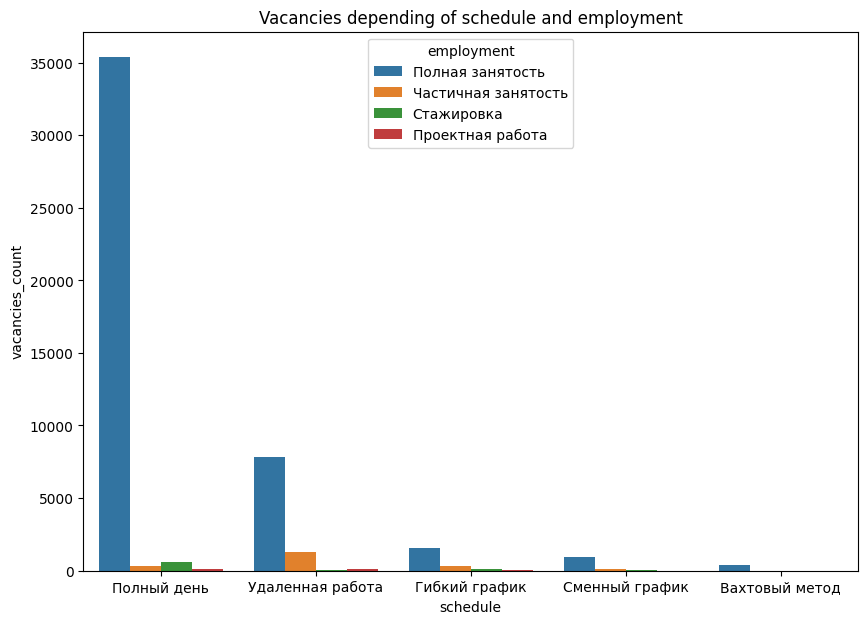

In [234]:
df = pd.read_sql_query(query_4_4, connection)
df
fig = plt.figure(figsize=(10, 7))

barplot = sns.barplot(  #строим столбчатую диаграмму
    data=df,  #выбор данных 
    x='schedule',  #ось Х
    y='vacancies_count',  #ось У
    hue='employment',  #параметр различия по цвету
)
barplot.set_title('Vacancies depending of schedule and employment');  #название диаграммы

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [235]:
query_4_5 = f'''select experience, count(id)
    from public.vacancies
    group by experience
    order by count(id)
'''

In [236]:
df = pd.read_sql_query(query_4_5, connection)
df
fig = px.pie(  #строим круговую диаграмму
    df, 
    values='count',  #оценваемое значение
    names='experience',  #параметр оценки
    height=500, 
    width=700,
    title = 'Vacancies distribution depended on experience'  #название  графика
    )
fig.show()

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\1177620560.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



***

*В данном блоке был произведен детальный анализ вакансий. Было исследовано распределение вакансий по регионам. Как и ожидалось, наибольшее их количество сосредоточено в Москве и Санкт-Петербурге. Зарплатные предложения варьируются в среднем от  71 тыс до 111 тыс. Также было изучено распределение вакансий по типам занятости и рабочим графикам. У абсолютного большинства вакансий требуется полный рабочий день и полная занятость. В белее, чем половине вакансий (53,2%) требуется минимальный опыт работы -  от 1 до 3 лет. Опыт более 6 лет указан лишь в 3% вакансий.*

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [237]:
query_5_1 = f'''(select e.name, count(v.id) as vacancies_count
from public.employers e join public.vacancies v on v.employer_id=e.id
group by e.name, e.id
order by count(v.id) desc
limit 1)
union all
(select e.name, count(v.id)
from public.employers e join public.vacancies v on v.employer_id=e.id
group by e.name, e.id
order by count(v.id) desc
offset 4
limit 1)

'''

In [238]:
df = pd.read_sql_query(query_5_1, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\1792814825.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,vacancies_count
0,Яндекс,1933
1,Газпром нефть,331


*1.1 Запрос показывает 3 компании - лидера по колическтву вакансий*

In [239]:
query_5_1_1 = f'''(select e.name, count(v.id) as vacancies_count
from public.employers e join public.vacancies v on v.employer_id=e.id
group by e.name, e.id
order by count(v.id) desc
limit 3)

'''

In [240]:
df = pd.read_sql_query(query_5_1_1, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3828282777.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,name,vacancies_count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [241]:
query_5_2 = f'''select a.name as region, count(distinct e.id) as employers_count, count(v.id) as vacancies_count
from public.areas a 
left join public.employers e on e.area=a.id 
left join public.vacancies v on v.area_id=a.id
where v.id is null
group by a.id
order by count(distinct e.id) desc
limit 1

'''

In [242]:
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3341481329.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,region,employers_count,vacancies_count
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [131]:
query_5_3 = f'''select e.name as employer_name, count(distinct v.area_id) as area_count
from public.vacancies v join public.employers e on e.id=v.employer_id

group by e.name
order by count(distinct v.area_id) desc
'''

In [133]:
df = pd.read_sql_query(query_5_3, connection)
df.head(15)

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\1949369368.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,employer_name,area_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [245]:
query_5_4 = f'''select count(e.name) vacancies_count
from public.employers e left join public.employers_industries ei on e.id=ei.employer_id
where ei.industry_id is null
group by ei.industry_id

'''

In [246]:
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3114411492.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,vacancies_count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [248]:
query_5_5 = f'''select e.name as company_name
from public.employers e left join public.employers_industries ei on e.id=ei.employer_id
group by e.name
having count(ei.industry_id) = 4
order by e.name
offset 2
limit 1

'''

In [249]:
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\1650419958.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,company_name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [250]:
query_5_6 = f'''select count(e.id) as vacancies_count
from public.employers_industries ei left join public.employers e on e.id=ei.employer_id
left join public.industries i on i.id=ei.industry_id
where i.name = 'Разработка программного обеспечения'
group by i.name

'''

In [251]:
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\1169039133.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,vacancies_count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [252]:
import urllib.parse as req
    
path_common = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России#Список_городов-миллионеров')
url = path_common.scheme + '://' + req.quote(path_common.netloc) +  req.quote(path_common.path) + '#'+ req.quote(path_common.fragment)
    
df = pd.read_html(url)[1]  

cities_mln_list = list(df['Город'].replace('Воронеж[a]', 'Воронеж'))
cities_mln = tuple(cities_mln_list)
display(cities_mln)

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [254]:
query_5_7 = f'''(select e.name as company, count(v.id) as vacancies_count_in_region
from public.vacancies v join public.employers e on e.id=v.employer_id
join public.areas a on a.id=v.area_id
where e.name = 'Яндекс'
    and a.name in {cities_mln}
group by e.id, a.id
order by count(v.id))

union all

(select 'TOTAL', count(*) 
from public.vacancies v join public.employers e on e.id=v.employer_id
join public.areas a on a.id=v.area_id
where e.name = 'Яндекс'
    and a.name in {cities_mln})
'''

In [255]:
df = pd.read_sql_query(query_5_7, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3129374555.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,company,vacancies_count_in_region
0,TOTAL,485
1,Яндекс,21
2,Яндекс,22
3,Яндекс,23
4,Яндекс,24
5,Яндекс,25
6,Яндекс,25
7,Яндекс,25
8,Яндекс,26
9,Яндекс,26


***

*7.1 Запрос показывает количество вакансий Коомпании Яндекс в каждом из городов-миллионников.*

In [256]:
query_5_7_1 = f'''select e.name as company, count(v.id) as vacancies_count_in_region, a.name as region
from public.vacancies v join public.employers e on e.id=v.employer_id
join public.areas a on a.id=v.area_id
where e.name = 'Яндекс'
    and a.name in {cities_mln}
group by e.id, a.id, v.area_id
order by count(v.id) desc

'''

In [257]:
df = pd.read_sql_query(query_5_7_1, connection)
df
fig = px.bar(
    data_frame=df, 
    x="region", 
    y="vacancies_count_in_region", 
    text = 'vacancies_count_in_region', 
    orientation='v', 
    height=500, 
    width=800,
    title='Yandex vacancies in million cities' 
)
fig.show()

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\162329866.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



*8. Данный запрос показывает, какую максимальную заработную плату предлагает Яндекс и в каком регионе.*

In [156]:
query_5_8 = f'''(select a.name as region, max(salary_to) as max_salary

    from public.vacancies v left join public.employers e on v.employer_id = e.id
    left join public.areas a on a.id = v.area_id
    where (e.name = 'Яндекс')
    and salary_to is not null
    group by a.name
    
    order by 2 desc
    limit 1) #
    
    union all
    
(select a.name, max(salary_from)

    from public.vacancies v left join public.employers e on v.employer_id = e.id
    left join public.areas a on a.id = v.area_id
    where (e.name = 'Яндекс')
    and salary_from is not null
    group by a.name
    
    order by 2 desc
    limit 1)
'''


In [157]:
df = pd.read_sql_query(query_5_8, connection) #этот запрос необходим, чтобы понять максимальную зарплату Яндекса 
#(находим максимум в salary_to и в salary_from)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\2986420559.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,region,max_salary
0,Москва,120000
1,Москва,80000


В данном разделе были исследованы работодатели. Обнаружено, что самое большое количество вакансий у компании Яндекс. В тройку лидеров по количеству вакансий входят Яндекс, Ростелеком и Тинькофф. По количеству регионов, в которых публикуются вакансии, лидерами являются также Яндекс и Ростелеком, а вот Тинькофф в этом списке стоит лишь на 15м месте. 
В компании Яндекс наибoльшее число вакансий опубликованы в Москве, Санкт-Петербурге и Екатеринбурге. В городах-миллионниках у Яндекса опубликовано 485 вакансий, что составляет четверть всех его вакансий. Максимальная заработная плата в вакансиях Яндекса составляет 120000, находится в регионе Москва.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [258]:
query_6_1 = f'''select count(name) as count_vacancies
from public.vacancies
where name ilike '%данн%' 
   or name ilike '%data%'
   or name ilike 'data%'
   or name like '%data'
   or name like 'данн%'
   or name like '%данн'
'''

In [259]:
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\485020324.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [260]:
query_6_2 = f'''select count(name) as count_vacancies
from public.vacancies
where ((name ilike '%data scientist%')
or (name ilike '%data science%')
or (name ilike '%исследователь данных%')
or ((name like '%ML%')
and (name not like '%HTML%'))
or (name ilike '%machine learning%')
or (name ilike '%машинн%обучен%'))
and (name ilike '%junior%'
or experience ilike '%нет опыта%'
or employment ilike '%cтажировка%')
'''

In [261]:
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3641650667.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count_vacancies
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [262]:
query_6_3 = f'''select count(name) as count_vacancies
from public.vacancies
where ((name ilike '%data scientist%')
or (name ilike '%data science%')
or (name ilike '%исследователь данных%')
or ((name like '%ML%')
and (name not like '%HTML%'))
or (name ilike '%machine learning%')
or (name ilike '%машинн%обучен%'))
and (key_skills like '%SQL%'
or key_skills ilike '%postgres%')
'''

In [263]:
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\1159587760.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count_vacancies
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [267]:
query_6_4 = f'''select count(name) as count_vacancies
from public.vacancies
where ((name ilike '%data scientist%')
or (name ilike '%data science%')
or (name ilike '%исследователь данных%')
or ((name like '%ML%')
and (name not like '%HTML%'))
or (name ilike '%machine learning%')
or (name ilike '%машинн%обучен%'))
and (key_skills ilike '%python%')
'''

In [268]:
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\972386973.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,count_vacancies
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [269]:
query_6_5 = f'''select round((avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1)), 2) as avg_key_skills,
max(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1) as max_skills_quantity,
min(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1) as min_skills_quantity

from public.vacancies
where ((name ilike '%data scientist%')
or (name ilike '%data science%')
or (name ilike '%исследователь данных%')
or ((name like '%ML%')
and (name not like '%HTML%'))
or (name ilike '%machine learning%')
or (name ilike '%машинн%обучен%'))
and (key_skills is not null)

'''

In [270]:
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\390248827.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,avg_key_skills,max_skills_quantity,min_skills_quantity
0,6.41,20,1


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [271]:
query_6_6 = f'''select experience,
round(avg(coalesce((salary_from+salary_to)/2, salary_to, salary_from))) as avg_salary
from public.vacancies
where ((name ilike '%data scientist%')
or (name ilike '%data science%')
or (name ilike '%исследователь данных%')
or ((name like '%ML%')
and (name not like '%HTML%'))
or (name ilike '%machine learning%')
or (name ilike '%машинн%обучен%'))
and (salary_to is not null or salary_from is not null)
group by experience

'''

In [273]:
df = pd.read_sql_query(query_6_6, connection)
df
fig = px.bar( #строим столбчатую диаграмму
    data_frame=df, 
    x="experience", #ось Х
    y="avg_salary", #ось У
   
    text = 'avg_salary', #подписи столбиков
    orientation='v', #ориентация диаграммы
    height=500, 
    width=800,
    title='Average salary and experience demanded' #название диаграммы
)
fig.show()

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3757611158.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



***

В данном разделе были детально исследованы вакансии для дата-саентистов:
- был произведен анализ уровня заработной платы дата-саентистов в зависимости от опыта работы. Заработная плата для опытного дата-саентиста (с опытом работы от 3 до 6 лет) более чем в 3 раза прешвышает уровень зарплаты для дата-саентиста без опыта работы. При этом работадатели не требуют от них опыта работы более 6 лет. То есть опыта работы 3 года достаточно, чтобы претендовать на высокую заработную плату;
- для начинающих дата-саентистов имеется всего 51 вакансия, это всего 11% от общего числа вакансия для дата-саентистов;
- 1771 вакансия, т.е. всего 3,5% от их общего числа в базе, имеет отношение к данным:
- в большинстве вакансий для дата-саентистов, требуется владение Python;
- максимально количество требуемых ключевых навыков составляет 20, в среднем работодатели требуют от дата-саентистов владение 6ю навыками.

*7. Данный запрос показывает соотношение типов рабочего графика у вакансий, связанных с данными:*

In [179]:
query_7 = f'''select count(name) as count_vacancies,
schedule
from public.vacancies

where name ilike '%данн%' 
   or name ilike '%data%'
   or name ilike 'data%'
   or name like '%data'
   or name like 'данн%'
   or name like '%данн'

group by schedule

'''

In [182]:
df = pd.read_sql_query(query_7, connection)
df
fig = px.pie(
    df, 
    values='count_vacancies', 
    names='schedule', 
    height=500, 
    width=700,
    title = 'Vacancies distribution depended on shedule (for vacancies related with data)'
    )
fig.show()

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\3884331319.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



*8. Данный запрос показывает соотношение типов рабочего графика у остальных вакансий (не связанных с данными)*

In [184]:
query_8 = f'''select count(name) as count_vacancies,
schedule
from public.vacancies
where (name not ilike '%данн%')
and (name not ilike '%data%')
and (name not ilike 'data%')
and (name not ilike '%data')
and (name not ilike 'данн%')
and (name not ilike '%данн')
group by schedule

'''

In [185]:
df = pd.read_sql_query(query_8, connection)
df
fig = px.pie(
    df, 
    values='count_vacancies', 
    names='schedule', 
    height=500, 
    width=700,
    title = 'Vacancies distribution depended on shedule (for non-data vacancies)'
    )
fig.show()

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\173528935.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



*9. Запрос показывает, какие компании предлагают максимальную заработную плату. Взяты по 3 строки максимальных salary_to и salary_from на случай, если у каких-то компаний один ис показателей не указан.*

In [186]:
query_9 = f'''(select e.name as company, max(salary_to) as max_salary
from public.employers e left join public.vacancies v on v.employer_id = e.id
where salary_to is not null
group by e.name
order by 2 desc
limit 5)

union all

(select e.name as company, max(salary_from) as max_salary
from public.employers e left join public.vacancies v on v.employer_id = e.id
where salary_from is not null
group by e.name
order by 2 desc
limit 5)

'''

In [191]:
df = pd.read_sql_query(query_9, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\722870376.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,company,max_salary
0,iBEC Systems,1000000
1,Шеф Маркет,1000000
2,Агентство недвижимости ЛЕТО,1000000
3,ЦТП,950000
4,RuWork,935176
5,Alpha Personnel,1000000
6,StaffRecruitment,650000
7,Петухова Алия,574000
8,"Август, Фирма",500000
9,ВСП Партнер,500000


*10. Данный запрос показывает в каких отряслях и для каких должностей предлагается заработная плата у четырех компаний, предлагающих наибольшую заработную плату, и у Яндекса для его максимальной зарплаты:*

In [193]:
query_10 = f'''(select e.name as company,  i.name as industry,  v.name as vacancy_name, max(salary_to) as max_salary
from public.employers e left join public.vacancies v on v.employer_id = e.id
left join public.employers_industries ei on ei.employer_id=e.id
left join industries i on i.id=ei.industry_id
where (salary_to is not null)
and ((e.name = 'Шеф Маркет')
or (e.name = 'iBEC Systems')
or (e.name = 'Агентство недвижимости ЛЕТО'))
group by e.name, i.name, e.id, v.name
having max(salary_to)=1000000
order by 1)

union all

(select e.name as company, i.name as industry,  v.name as vacancy_name, max(salary_from) as max_salary
from public.employers e left join public.vacancies v on v.employer_id = e.id
left join public.employers_industries ei on ei.employer_id=e.id
left join industries i on i.id=ei.industry_id
where (salary_from is not null)
and (e.name = 'Alpha Personnel')
group by e.name, i.name, e.id, v.name)

union all

(select e.name as company,  i.name as industry,  v.name as vacancy_name, max(salary_to) as max_salary
from public.employers e left join public.vacancies v on v.employer_id = e.id
left join public.employers_industries ei on ei.employer_id=e.id
left join industries i on i.id=ei.industry_id
where (salary_to is not null)
and (e.name = 'Яндекс')
group by e.name, i.name, e.id, v.name
having max(salary_to)=120000)

'''

In [198]:
df = pd.read_sql_query(query_10, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\2707990482.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,company,industry,vacancy_name,max_salary
0,Яндекс,"Интернет-компания (поисковики, платежные систе...",Менеджер по проектам Яндекс.Услуги,120000
1,Alpha Personnel,Кадровые агентства,Технический директор,1000000
2,iBEC Systems,"Интернет-компания (поисковики, платежные систе...",QA Automation Engineer,1000000
3,Агентство недвижимости ЛЕТО,"Консалтинг, оценка в недвижимости",Брокер по продаже апартаментов,1000000
4,Агентство недвижимости ЛЕТО,Агентские услуги в недвижимости,Брокер по продаже апартаментов,1000000
5,Шеф Маркет,Розничная сеть (DIY и товары для дома),СТО/Директор по разработке,1000000
6,Шеф Маркет,"Полуфабрикаты, в том числе замороженные (произ...",СТО/Директор по разработке,1000000
7,Шеф Маркет,Разработка программного обеспечения,СТО/Директор по разработке,1000000
8,Шеф Маркет,Интернет-магазин,СТО/Директор по разработке,1000000


*По результатам запроса понятно, что 1 000 000 руб. предлагается для ТОП-менеджмента компании, а вакансия Яндеккса - руковолдящая должность, но не ТОП-менеджмент*

*11. Данный запрос показывает самые восстребованные специальности (на момент формирования базы), а также их среднюю заработную плату.*

In [205]:
query_10 = f'''select distinct name as vacancy_name, 
count (name) as ccount_vacancies,
avg(salary_to) as avg_salary,
max(salary_to)
from public.vacancies
group by name
order by 2 desc

'''

In [210]:
df = pd.read_sql_query(query_10, connection)
df

C:\Users\free-\AppData\Local\Temp\ipykernel_100384\2707990482.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,vacancy_name,ccount_vacancies,avg_salary,max
0,Системный администратор,1761,56528.733931,250000.0
1,Программист 1С,1153,148989.336066,350000.0
2,Бизнес-аналитик,488,109416.280899,250000.0
3,Специалист технической поддержки,457,49456.034826,150000.0
4,Системный аналитик,432,165595.183333,450000.0
...,...,...,...,...
21218,Юрисконсульт/Специалист по защите персональных...,1,NaN,NaN
21219,Юрист,1,NaN,NaN
21220,Юрист- аналитик (127-ФЗ О несостоятельности / ...,1,60000.000000,60000.0
21221,Юрист-аналитик в Клиентский отдел,1,50000.000000,50000.0


# Общий вывод по проекту

В данном проекте были исследованы вакансии сайта Headhunter.ru. Анализ работодателей показал, что в тройку лидеров по количеству опубликованных вакансий входят компании Яндекс, Ростелеком и Тинькофф, у которых 1933, 491 и 444 вакансии соотвественно. Причем абсолютным лидером является Яндекс. Это может  свидетельствовать о том, что развитие компании происходит наибыстрыми темпами по сравнению с остальными, она активно набирает новых сотрудников. Также это может говорить о высоком уровне "текучки кадров". Или о том, что у компании в принципе большой штат. Для того, чтобы сделать правильные выводы, необходимы данные непосредственно о компании. Очень жаль, что не указана дата формирования базы данных и неплохо было бы рассмотреть эти данные в динамике.
Максимальная заработная плата у вакансий Яндекса составляет 120 000 рыблей.
Самые большие заработные платы, а именно 1 000 000 руб., предлагают 4 компании: 
- iBEC Systems; 
- Шеф Маркет;
- Агентство недвижимости ЛЕТО;
- Alpha Personnel

Невооруженным взглядом видно, что Яндекс предлагает далеко не самую высокую заработную плату на рынке. Конечно, это зависит от должности вакансии, также возможно, что у Яндекса присутствует привлекательная премиальная система, которая значительно увеличивает первоначальную зарплату.
Ну а самыми восстребованными специальностями являются пециальности IT-сферы - системный администратор и программист 1С. Максимальные предлагаемые зарпплаты этим специальностям - 250 000 руб. и 350 000 руб. соответственно.
В целом работа над данным проектом была довольна интересна, однако провести более интересные исследования и сделать более информативные и интересные выводы можно было бы, если рассмотреть базы данных вакансий, собираемых в разные даты, чтобы была видна динамика различных показателей.